In [1]:
%matplotlib widget

In [2]:
from bmcs_cross_section.mkappa.mkappa import MKappa
from bmcs_cross_section.cs_design import TShape, BarLayer, CrossSectionDesign
import matplotlib.pyplot as plt
from bmcs_cross_section.matmod import PWLConcreteMatMod, EC2ConcreteMatMod
import numpy as np
import sympy as sp
import pandas as pd
sp.init_printing()

In [3]:
mc = MKappa(name='moment-curvature', low_kappa=-0.000014, high_kappa=0.00003)

In [6]:
mc.matrix = 'piecewise linear'
css = mc.cross_section_shape = 'T-shape'
csl = mc.cross_section_layout
bl1 = BarLayer(name='steel 1', z=10, ds=10, count=2 )
bl2 = BarLayer(name='steel 2', z=30, ds=10, count=2 )
csl.add_layer(bl1)
csl.add_layer(bl2)

In [7]:
mc.interact(figsize=(7,4),tight_layout=True)

update plot
plot - mk
M - k recalculated


# Inversion of the $M-\kappa$ curve

To enable the integration of curvature along the beam for a given moment $\kappa(M)$ relation is needed 
which is monotonically increasing. A general way of flattening and drops in the $M(\kappa)$ curve is provided below.

In [5]:
xdata = np.array([0,1,0.9, 0.8, 2])
ydata = np.array([0,1,2,3, 4])

In [6]:
plt.plot(xdata, ydata)
plt.show()

In [7]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [8]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [9]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [10]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [11]:
i_x = np.argmin(diffs, axis=1)

In [12]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

In [13]:
plt.plot(xdata[i_x], ydata)
plt.show()

In [12]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [13]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [14]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [15]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [16]:
i_x = np.argmin(diffs, axis=1)

In [17]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

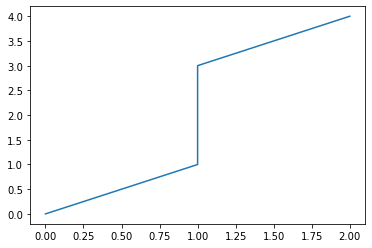

In [18]:
plt.plot(xdata[i_x], ydata)
plt.show()

In [19]:
diffs = xdata[:,np.newaxis] - xdata[np.newaxis,:]
diffs

array([[ 0. , -1. , -0.9, -0.8, -2. ],
       [ 1. ,  0. ,  0.1,  0.2, -1. ],
       [ 0.9, -0.1,  0. ,  0.1, -1.1],
       [ 0.8, -0.2, -0.1,  0. , -1.2],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [20]:
ij = np.mgrid[0:5:1,0:5:1]
ij

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [21]:
diffs[np.where(ij[1] >= ij[0])] = 0

In [22]:
diffs

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9, -0.1,  0. ,  0. ,  0. ],
       [ 0.8, -0.2, -0.1,  0. ,  0. ],
       [ 2. ,  1. ,  1.1,  1.2,  0. ]])

In [23]:
i_x = np.argmin(diffs, axis=1)

In [24]:
xdata[i_x]

array([0., 1., 1., 1., 2.])

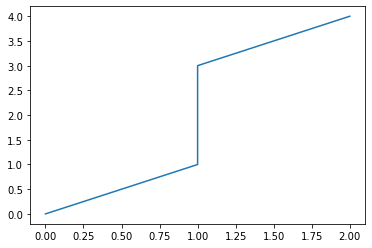

In [25]:
plt.plot(xdata[i_x], ydata)
plt.show()